# HW 4 CS 334
Hanna Meinikheim

9-10-2021

Logistic Regression

# Logistic Regression
---
Is it going to rain in Boise today? Create a Jupyter Notebook at that performs Logistic Regression using scikit-learn to predict the answer to this yes/no question.

- [ ] **Find some data.** You’re looking for a data set that has historic weather data for Boise, Idaho. Search for one yourself, that’s part of the assignment! There are many websites that offer APIs or searches that allow free downloads of a given time range and location. Select at least one year (maybe more) of recent weather data. A good data set will have things like temperature, barometric pressure, wind speed, etc. And of course, it must have some indication about whether it rained that day, usually in the form of inches of precipitation.
- [ ] **Pull this data into your project.** Download the data, and import it into your project as a file. Perhaps using Pandas and import it as a CSV file? You may have to create a new column indicating the label: `0 = no rain, 1 = rain`. This column is an important part of the training process. It’s not a feature, it’s a label for that given vector.
- [ ] **Use Logistic Regression.** You’re trying to answer the question, “Is it going to rain today in Boise?” Train a model that tries to predict if it’s going to rain on a given day. The “day” is a vector/row/array/sample of given features that you feed into the model to get a prediction. Remember, you need the same number of features (columns) for a given prediction that you used to train the model.
- [ ] **How good is your model?** Is it better than a wild guess? Document your findings in the notebook.
- [ ] **Push Jupyter Notebook to github**

### Finding the data
- I found out that Weather Underground no longer gives out free weather API keys as part of their program. [Weather Underground API GONE?](https://forum.pvoutput.org/t/weather-underground-api-gone/576)
- I submitted an order to NOAA and got the requested data. I just have to upload it to the Jupyter Notebook.

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

In [24]:
col_names = ['station', 'name', 'date', 'awnd', 'pgtm', 'prcp', 'snow', 'snwd', 'tavg', 'tmax', 'tmin', 'wdf2', 'wdf5', 'wsf2', 'wsf5', 'wt01', 'wt02', 'wt03', 'wt05', 'wt06', 'wt08']
# PRCP = Precipitation (tenths of mm) 
# SNWD = Snow depth (mm) 
# SNOW = Snowfall (mm)
# TAVG = Average temperature (tenths of degrees C)
# TMAX = Maximum temperature (tenths of degrees C)
# TMIN = Minimum temperature (tenths of degrees C)
# AWND = Average daily wind speed (tenths of meters per second)
# WDF2 = Direction of fastest 2-minute wind (degrees)
# WDF5 = Direction of fastest 5-second wind (degrees)
# WSF2 = Fastest 2-minute wind speed (tenths of meters per second)
# WSF5 = Fastest 5-second wind speed (tenths of meters per second)
# PGTM = PGTM = Peak gust time (hours and minutes, i.e., HHMM)
### the below weather types have values of `0 for not there or 1 for present`
# WT01 = Weather Type [Fog, ice fog, or freezing fog (may include heavy fog)]
# WT06 = Weather Type [Glaze or rime]
# WT05 = Weather Type [Hail (may include small hail)]
# WT02 = Weather Type [Heavy fog or heaving freezing fog (not always distinguished from fog)]
# WT08 = Weather Type [Smoke or haze]
# WT03 = Weather Type [Thunder]

# load dataset
weather = pd.read_csv("weatherdataNOAA.csv", header=None, names=col_names, skiprows=[0])

In [25]:
weather.head()

,station,name,date,awnd,pgtm,prcp,snow,snwd,tavg,tmax,...,wdf2,wdf5,wsf2,wsf5,wt01,wt02,wt03,wt05,wt06,wt08
0,USW00024131,"BOISE AIR TERMINAL, ID US",1/1/2018,2.68,NaN,0.00,0.0,2.0,26,35,...,140,130,10.1,12.1,1.0,NaN,NaN,NaN,NaN,1.0
1,USW00024131,"BOISE AIR TERMINAL, ID US",1/2/2018,8.05,NaN,0.00,0.0,1.2,26,34,...,140,140,19.9,25.1,1.0,NaN,NaN,NaN,NaN,1.0
2,USW00024131,"BOISE AIR TERMINAL, ID US",1/3/2018,2.91,NaN,0.00,0.0,1.2,28,35,...,160,150,14.1,19.0,1.0,NaN,NaN,NaN,NaN,1.0
3,USW00024131,"BOISE AIR TERMINAL, ID US",1/4/2018,2.01,NaN,0.00,0.0,1.2,26,36,...,230,280,8.1,14.1,1.0,NaN,NaN,NaN,NaN,1.0
4,USW00024131,"BOISE AIR TERMINAL, ID US",1/5/2018,2.46,NaN,0.01,0.0,1.2,31,41,...,310,300,15.0,19.0,1.0,NaN,NaN,NaN,NaN,1.0


In [26]:
# dropping columns 'station' and 'name' because all rows are collected at the same place
weather.drop('station', axis=1, inplace=True)
weather.drop('name',  axis=1, inplace=True)
weather.head()

,date,awnd,pgtm,prcp,snow,snwd,tavg,tmax,tmin,wdf2,wdf5,wsf2,wsf5,wt01,wt02,wt03,wt05,wt06,wt08
0,1/1/2018,2.68,NaN,0.00,0.0,2.0,26,35,19,140,130,10.1,12.1,1.0,NaN,NaN,NaN,NaN,1.0
1,1/2/2018,8.05,NaN,0.00,0.0,1.2,26,34,18,140,140,19.9,25.1,1.0,NaN,NaN,NaN,NaN,1.0
2,1/3/2018,2.91,NaN,0.00,0.0,1.2,28,35,20,160,150,14.1,19.0,1.0,NaN,NaN,NaN,NaN,1.0
3,1/4/2018,2.01,NaN,0.00,0.0,1.2,26,36,19,230,280,8.1,14.1,1.0,NaN,NaN,NaN,NaN,1.0
4,1/5/2018,2.46,NaN,0.01,0.0,1.2,31,41,26,310,300,15.0,19.0,1.0,NaN,NaN,NaN,NaN,1.0


In [27]:
# df['is_rich_method1'] = np.where(df['salary']>=50, 'yes', 'no')
weather['rain'] = np.where(weather['prcp']>0, 1, 0)
weather.head()

,date,awnd,pgtm,prcp,snow,snwd,tavg,tmax,tmin,wdf2,wdf5,wsf2,wsf5,wt01,wt02,wt03,wt05,wt06,wt08,rain
0,1/1/2018,2.68,NaN,0.00,0.0,2.0,26,35,19,140,130,10.1,12.1,1.0,NaN,NaN,NaN,NaN,1.0,0
1,1/2/2018,8.05,NaN,0.00,0.0,1.2,26,34,18,140,140,19.9,25.1,1.0,NaN,NaN,NaN,NaN,1.0,0
2,1/3/2018,2.91,NaN,0.00,0.0,1.2,28,35,20,160,150,14.1,19.0,1.0,NaN,NaN,NaN,NaN,1.0,0
3,1/4/2018,2.01,NaN,0.00,0.0,1.2,26,36,19,230,280,8.1,14.1,1.0,NaN,NaN,NaN,NaN,1.0,0
4,1/5/2018,2.46,NaN,0.01,0.0,1.2,31,41,26,310,300,15.0,19.0,1.0,NaN,NaN,NaN,NaN,1.0,1


In [29]:
# fillin NaN with 0
weather = weather.fillna(0)
weather.head()

,date,awnd,pgtm,prcp,snow,snwd,tavg,tmax,tmin,wdf2,wdf5,wsf2,wsf5,wt01,wt02,wt03,wt05,wt06,wt08,rain
0,1/1/2018,2.68,0.0,0.00,0.0,2.0,26,35,19,140,130,10.1,12.1,1.0,0.0,0.0,0.0,0.0,1.0,0
1,1/2/2018,8.05,0.0,0.00,0.0,1.2,26,34,18,140,140,19.9,25.1,1.0,0.0,0.0,0.0,0.0,1.0,0
2,1/3/2018,2.91,0.0,0.00,0.0,1.2,28,35,20,160,150,14.1,19.0,1.0,0.0,0.0,0.0,0.0,1.0,0
3,1/4/2018,2.01,0.0,0.00,0.0,1.2,26,36,19,230,280,8.1,14.1,1.0,0.0,0.0,0.0,0.0,1.0,0
4,1/5/2018,2.46,0.0,0.01,0.0,1.2,31,41,26,310,300,15.0,19.0,1.0,0.0,0.0,0.0,0.0,1.0,1


In [68]:
col_names2 = ['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'AWND', 'AWND_ATTRIBUTES', 'FMTM', 'FMTM_ATTRIBUTES', 
              'PGTM', 'PGTM_ATTRIBUTES', 'PRCP', 'PRCP_ATTRIBUTES', 'SNOW', 'SNOW_ATTRIBUTES', 'SNWD', 'SNWD_ATTRIBUTES', 'TAVG', 'TAVG_ATTRIBUTES', 
              'TMAX', 'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES', 'WDF2', 'WDF2_ATTRIBUTES', 'WDF5', 'WDF5_ATTRIBUTES', 'WESD', 
              'WESD_ATTRIBUTES', 'WSF2', 'WSF2_ATTRIBUTES', 'WSF5', 'WSF5_ATTRIBUTES', 'WT01', 'WT01_ATTRIBUTES', 'WT02', 'WT02_ATTRIBUTES', 
              'WT03', 'WT03_ATTRIBUTES', 'WT04', 'WT04_ATTRIBUTES', 'WT05', 'WT05_ATTRIBUTES', 'WT06', 'WT06_ATTRIBUTES', 'WT07', 
              'WT07_ATTRIBUTES', 'WT08', 'WT08_ATTRIBUTES', 'WT09', 'WT09_ATTRIBUTES', 'WT11', 'WT11_ATTRIBUTES', 'WT13', 'WT13_ATTRIBUTES', 
              'WT16', 'WT16_ATTRIBUTES', 'WT17', 'WT17_ATTRIBUTES', 'WT18', 'WT18_ATTRIBUTES', 'WT19', 'WT19_ATTRIBUTES', 'WT22', 
              'WT22_ATTRIBUTES']
df = pd.read_csv("wDATA-NOAA-2010.csv",header=None, names=col_names2, skiprows=[0])
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,FMTM,FMTM_ATTRIBUTES,...,WT16,WT16_ATTRIBUTES,WT17,WT17_ATTRIBUTES,WT18,WT18_ATTRIBUTES,WT19,WT19_ATTRIBUTES,WT22,WT22_ATTRIBUTES
0,USW00024131,"BOISE AIR TERMINAL, ID US",43.5666,-116.24055,875.4,1/1/2010,6.3,",,W",2137.0,",,X",...,1.0,",,X",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00024131,"BOISE AIR TERMINAL, ID US",43.5666,-116.24055,875.4,1/2/2010,0.9,",,W",48.0,",,X",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00024131,"BOISE AIR TERMINAL, ID US",43.5666,-116.24055,875.4,1/3/2010,1.6,",,W",1155.0,",,X",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,",,X"
3,USW00024131,"BOISE AIR TERMINAL, ID US",43.5666,-116.24055,875.4,1/4/2010,1.3,",,W",2057.0,",,X",...,NaN,NaN,NaN,NaN,1.0,",,X",NaN,NaN,NaN,NaN
4,USW00024131,"BOISE AIR TERMINAL, ID US",43.5666,-116.24055,875.4,1/5/2010,0.7,",,W",1933.0,",,X",...,1.0,",,X",NaN,NaN,1.0,",,X",1.0,",,X",NaN,NaN


In [69]:
df.drop(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE'], axis=1, inplace=True)
df.drop(['AWND_ATTRIBUTES','FMTM_ATTRIBUTES', 'PGTM_ATTRIBUTES', 'PRCP_ATTRIBUTES','SNOW_ATTRIBUTES', 'SNWD_ATTRIBUTES', 'TAVG_ATTRIBUTES', 
              'TMAX_ATTRIBUTES', 'TMIN_ATTRIBUTES', 'WDF2_ATTRIBUTES', 'WDF5_ATTRIBUTES', 
              'WESD_ATTRIBUTES', 'WSF2_ATTRIBUTES', 'WSF5_ATTRIBUTES', 'WT01_ATTRIBUTES', 'WT02_ATTRIBUTES', 
              'WT03_ATTRIBUTES', 'WT04_ATTRIBUTES', 'WT05_ATTRIBUTES', 'WT06_ATTRIBUTES',  
              'WT07_ATTRIBUTES', 'WT08_ATTRIBUTES', 'WT09_ATTRIBUTES', 'WT11_ATTRIBUTES', 'WT13_ATTRIBUTES', 
              'WT16_ATTRIBUTES', 'WT17_ATTRIBUTES', 'WT18_ATTRIBUTES', 'WT19_ATTRIBUTES',  
              'WT22_ATTRIBUTES'], axis=1, inplace=True)
df.head()
# WT03 - Thunder
# WT04 - Ice pellets, sleet, snow pellets, or small hail"
# PRCP - Precipitation
# WT05 - Hail (may include small hail)
# WT06 - Glaze or rime
# WT07 - Dust, volcanic ash, blowing dust, blowing sand, or blowing obstruction
# WT08 - Smoke or haze
# SNWD - Snow depth
# WT09 - Blowing or drifting snow
# WDF2 - Direction of fastest 2-minute wind
# WDF5 - Direction of fastest 5-second wind
# PGTM - Peak gust time
# WT11 - High or damaging winds
# TMAX - Maximum temperature
# WT13 - Mist
# WSF2 - Fastest 2-minute wind speed
# FMTM - Time of fastest mile or fastest 1-minute wind
# WSF5 - Fastest 5-second wind speed
# SNOW - Snowfall
# WT16 - Rain (may include freezing rain, drizzle, and freezing drizzle)"
# WT17 - Freezing rain
# WT18 - Snow, snow pellets, snow grains, or ice crystals
# WT19 - Unknown source of precipitation
# AWND - Average wind speed
# WT22 - Ice fog or freezing fog
# WT01 - Fog, ice fog, or freezing fog (may include heavy fog)
# WESD - Water equivalent of snow on the ground
# WT02 - Heavy fog or heaving freezing fog (not always distinguished from fog)
# TAVG - Average Temperature.
# TMIN - Minimum temperature
# df.drop(['C', 'D'], axis = 1)

,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,...,WT07,WT08,WT09,WT11,WT13,WT16,WT17,WT18,WT19,WT22
0,6.3,2137.0,2136.0,11.2,0,51,NaN,6.7,1.7,280.0,...,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN
1,0.9,48.0,717.0,0.0,0,0,NaN,7.8,-1.1,130.0,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.6,1155.0,1153.0,0.0,0,0,NaN,4.4,-5.6,150.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
3,1.3,2057.0,1208.0,0.0,0,0,NaN,1.7,-2.2,70.0,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN
4,0.7,1933.0,929.0,1.3,0,0,NaN,2.2,-0.6,310.0,...,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0,1.0,NaN


In [70]:
df['rain'] = np.where(df['PRCP']>0, 1, 0)
df = df.fillna(0)
df.head()

,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,...,WT08,WT09,WT11,WT13,WT16,WT17,WT18,WT19,WT22,rain
0,6.3,2137.0,2136.0,11.2,0,51,0.0,6.7,1.7,280.0,...,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1
1,0.9,48.0,717.0,0.0,0,0,0.0,7.8,-1.1,130.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.6,1155.0,1153.0,0.0,0,0,0.0,4.4,-5.6,150.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
3,1.3,2057.0,1208.0,0.0,0,0,0.0,1.7,-2.2,70.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
4,0.7,1933.0,929.0,1.3,0,0,0.0,2.2,-0.6,310.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1


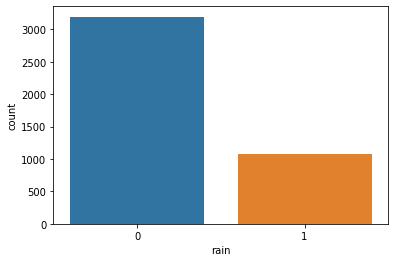

In [71]:
ax = sns.countplot(x='rain', data=df)

In [60]:
feature_cols = ['AWND', 'FMTM', 
              'PGTM', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 
              'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WESD', 
              'WSF2', 'WSF5', 'WT01', 'WT02', 
              'WT03', 'WT04', 'WT05', 'WT06', 'WT07', 
              'WT08', 'WT09', 'WT11', 'WT13',  
              'WT16', 'WT17', 'WT18', 'WT19', 'WT22']
X = df[feature_cols] # features
y = df.rain

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=25)

In [73]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=5000)

# fit the model with data
logreg.fit(X_train,y_train)


y_pred = logreg.predict(X_test)

In [74]:
X_test

,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,...,WT07,WT08,WT09,WT11,WT13,WT16,WT17,WT18,WT19,WT22
1959,2.6,0.0,0.0,0.0,0,0,13.9,22.2,8.3,340.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118,5.5,1625.0,1104.0,0.0,0,0,0.0,11.1,0.6,320.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2252,2.8,0.0,0.0,0.0,0,0,9.9,15.0,2.8,130.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1896,3.0,0.0,0.0,0.0,0,0,11.7,17.8,7.2,300.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1973,2.5,0.0,0.0,0.0,0,0,18.0,26.1,9.4,310.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263,3.0,1802.0,1802.0,0.0,0,0,0.0,24.4,10.6,310.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2998,2.4,0.0,0.0,0.0,0,0,3.9,10.6,1.7,330.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1832,0.7,0.0,0.0,0.0,0,50,-1.0,5.0,-4.3,280.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2949,1.8,0.0,0.0,0.0,0,0,4.2,12.2,0.0,120.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9906367041198502


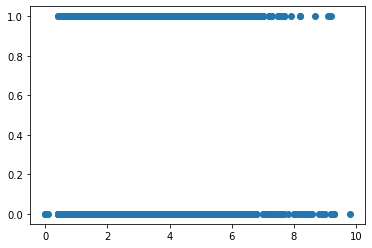

In [76]:
import matplotlib.pyplot as plt
plt.scatter(X['AWND'],y)
plt.show()

ModuleNotFoundError: No module named 'statsmodels'

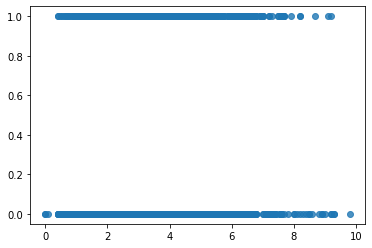

In [78]:
import seaborn as sns
sns.regplot(x = 'AWND', y = 'rain', data=df, logistic = True)
plt.plot()